In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump

In [2]:
data = pd.DataFrame({'ID' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'Name' : ['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew', 'Ravi', 'Garima', 'Kavita'],
             'Gender' :['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
              'Profession' : ['Manager', 'Manager', 'Developer', 'Team Lead', 'Team Lead', 'Assistant Manager', 'Assistant Manager', 'Manager', 'Assistant Manager', 'CEO'],
              'Salary' : [100000, 120000, 95000, 99000, 105000, 145000, 155000, 78000, 167000, 195000],
              'Experience' : [10, 13, 6, 8, 10, 13, 19, 15, 20, 24]})

In [4]:
data

ID     Name  Gender         Profession  Salary  Experience
0   1     John    Male            Manager  100000          10
1   2     Jack    Male            Manager  120000          13
2   3   Mariah  Female          Developer   95000           6
3   4  Krishna    Male          Team Lead   99000           8
4   5    Danny    Male          Team Lead  105000          10
5   6     Lisa  Female  Assistant Manager  145000          13
6   7   Andrew    Male  Assistant Manager  155000          19
7   8     Ravi    Male            Manager   78000          15
8   9   Garima  Female  Assistant Manager  167000          20
9  10   Kavita  Female                CEO  195000          24

In [5]:
data.describe()

ID         Salary  Experience
count  10.00000      10.000000   10.000000
mean    5.50000  125900.000000   13.800000
std     3.02765   37698.953714    5.731007
min     1.00000   78000.000000    6.000000
25%     3.25000   99250.000000   10.000000
50%     5.50000  112500.000000   13.000000
75%     7.75000  152500.000000   18.000000
max    10.00000  195000.000000   24.000000

### Explore the data types

In [6]:
data.dtypes

ID             int64
Name          object
Gender        object
Profession    object
Salary         int64
Experience     int64
dtype: object

### Separating categorical and numeric features

In [7]:
dictionary={}
dictionary['num'] = data.dtypes[data.dtypes!='object'].index
dictionary['cat'] = data.dtypes[data.dtypes=='object'].index
dictionary

{'num': Index(['ID', 'Salary', 'Experience'], dtype='object'),
 'cat': Index(['Name', 'Gender', 'Profession'], dtype='object')}

In [8]:
data.nunique()

ID            10
Name          10
Gender         2
Profession     5
Salary        10
Experience     8
dtype: int64

### Cardinality of Categorical Variables

In [9]:
data['Name'].unique()

array(['John', 'Jack', 'Mariah', 'Krishna', 'Danny', 'Lisa', 'Andrew',
       'Ravi', 'Garima', 'Kavita'], dtype=object)

In [10]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
data['Profession'].unique()

array(['Manager', 'Developer', 'Team Lead', 'Assistant Manager', 'CEO'],
      dtype=object)

### Frequency of categories in a categorical variable

In [13]:
data['Name'].value_counts()

Andrew     1
Jack       1
Lisa       1
Danny      1
Garima     1
Krishna    1
John       1
Ravi       1
Kavita     1
Mariah     1
Name: Name, dtype: int64

In [14]:
data['Gender'].value_counts()

Male      6
Female    4
Name: Gender, dtype: int64

In [15]:
data['Profession'].value_counts()

Assistant Manager    3
Manager              3
Team Lead            2
Developer            1
CEO                  1
Name: Profession, dtype: int64

<AxesSubplot:>

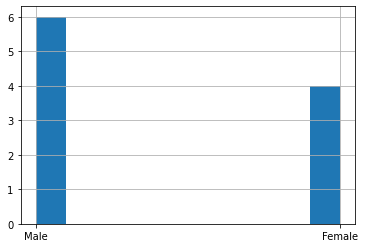

In [16]:
data['Gender'].hist()

<AxesSubplot:>

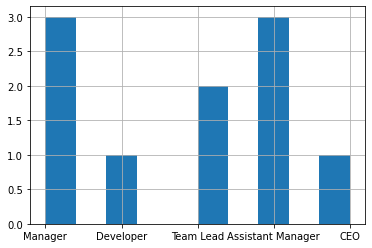

In [17]:
data['Profession'].hist()

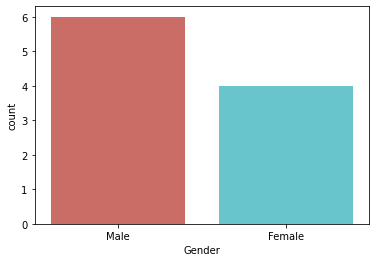

In [18]:
sns.countplot(x='Gender',data=data,palette='hls')
plt.show()

#### Numerical Variables

<AxesSubplot:>

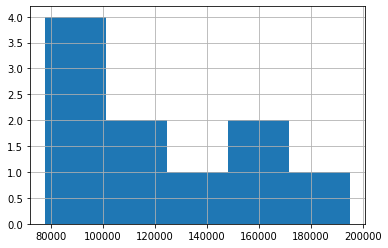

In [19]:
data['Salary'].hist(bins=5)

In [20]:
data[dictionary['cat']]

Name  Gender         Profession
0     John    Male            Manager
1     Jack    Male            Manager
2   Mariah  Female          Developer
3  Krishna    Male          Team Lead
4    Danny    Male          Team Lead
5     Lisa  Female  Assistant Manager
6   Andrew    Male  Assistant Manager
7     Ravi    Male            Manager
8   Garima  Female  Assistant Manager
9   Kavita  Female                CEO

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

In [23]:
# Profession column is ordinal data. Since we can rank the categories. Hence I can use the ordinal encoder

le_profession = OrdinalEncoder()
le_profession.fit(data[['Profession']])

OrdinalEncoder()

In [24]:
le_profession.categories_

[array(['Assistant Manager', 'CEO', 'Developer', 'Manager', 'Team Lead'],
       dtype=object)]

fit method learns the transformer's attributes. It does not change the column.
To change the column we will now use the learnt attribute to do the transformation by using transform function

In [25]:
data['Profession'] = le_profession.transform(data[['Profession']])
data

ID     Name  Gender  Profession  Salary  Experience
0   1     John    Male         3.0  100000          10
1   2     Jack    Male         3.0  120000          13
2   3   Mariah  Female         2.0   95000           6
3   4  Krishna    Male         4.0   99000           8
4   5    Danny    Male         4.0  105000          10
5   6     Lisa  Female         0.0  145000          13
6   7   Andrew    Male         0.0  155000          19
7   8     Ravi    Male         3.0   78000          15
8   9   Garima  Female         0.0  167000          20
9  10   Kavita  Female         1.0  195000          24

In [26]:
le_profession.inverse_transform(data[['Profession']])

array([['Manager'],
       ['Manager'],
       ['Developer'],
       ['Team Lead'],
       ['Team Lead'],
       ['Assistant Manager'],
       ['Assistant Manager'],
       ['Manager'],
       ['Assistant Manager'],
       ['CEO']], dtype=object)

In [27]:
# Gender is nominal data because it cannot be ranked. Hence we will apply one hot encoder

pd.get_dummies(data['Gender'])

Female  Male
0       0     1
1       0     1
2       1     0
3       0     1
4       0     1
5       1     0
6       0     1
7       0     1
8       1     0
9       1     0

In [28]:
data.drop(['Name'], inplace = True, axis = 1)
data

ID  Gender  Profession  Salary  Experience
0   1    Male         3.0  100000          10
1   2    Male         3.0  120000          13
2   3  Female         2.0   95000           6
3   4    Male         4.0   99000           8
4   5    Male         4.0  105000          10
5   6  Female         0.0  145000          13
6   7    Male         0.0  155000          19
7   8    Male         3.0   78000          15
8   9  Female         0.0  167000          20
9  10  Female         1.0  195000          24

In [29]:
data = pd.get_dummies(data)
data

ID  Profession  Salary  Experience  Gender_Female  Gender_Male
0   1         3.0  100000          10              0            1
1   2         3.0  120000          13              0            1
2   3         2.0   95000           6              1            0
3   4         4.0   99000           8              0            1
4   5         4.0  105000          10              0            1
5   6         0.0  145000          13              1            0
6   7         0.0  155000          19              0            1
7   8         3.0   78000          15              0            1
8   9         0.0  167000          20              1            0
9  10         1.0  195000          24              1            0

#### Scaling Numerical Variables using MinMax

The MinMax scaler brings down the value of the column between 0 and 1 where 0 corresponds to the lowest value and 1 corresponds to highest value

In [30]:
min_max_sal = MinMaxScaler()
min_max_sal.fit(data[['Salary']])

MinMaxScaler()

In [31]:
min_max_sal.data_max_, min_max_sal.data_min_

(array([195000.]), array([78000.]))

In [31]:
data

ID  Profession  Salary  Experience  Gender_Female  Gender_Male
0   1         3.0  100000          10              0            1
1   2         3.0  120000          13              0            1
2   3         2.0   95000           6              1            0
3   4         4.0   99000           8              0            1
4   5         4.0  105000          10              0            1
5   6         0.0  145000          13              1            0
6   7         0.0  155000          19              0            1
7   8         3.0   78000          15              0            1
8   9         0.0  167000          20              1            0
9  10         1.0  195000          24              1            0

In [32]:
data['Salary_min_max_scaled'] = min_max_sal.transform(data[['Salary']])
#(data.iloc[0]['Salary'] - data.Salary.min())/(data.Salary.max() - data.Salary.min())
data

ID  Profession  Salary  Experience  Gender_Female  Gender_Male  \
0   1         3.0  100000          10              0            1   
1   2         3.0  120000          13              0            1   
2   3         2.0   95000           6              1            0   
3   4         4.0   99000           8              0            1   
4   5         4.0  105000          10              0            1   
5   6         0.0  145000          13              1            0   
6   7         0.0  155000          19              0            1   
7   8         3.0   78000          15              0            1   
8   9         0.0  167000          20              1            0   
9  10         1.0  195000          24              1            0   

   Salary_min_max_scaled  
0               0.188034  
1               0.358974  
2               0.145299  
3               0.179487  
4               0.230769  
5               0.572650  
6               0.658120  
7               0.000000  
8               0.760684  
9               1.000000

In [33]:
data.describe()

ID  Profession         Salary  Experience  Gender_Female  \
count  10.00000   10.000000      10.000000   10.000000      10.000000   
mean    5.50000    2.000000  125900.000000   13.800000       0.400000   
std     3.02765    1.632993   37698.953714    5.731007       0.516398   
min     1.00000    0.000000   78000.000000    6.000000       0.000000   
25%     3.25000    0.250000   99250.000000   10.000000       0.000000   
50%     5.50000    2.500000  112500.000000   13.000000       0.000000   
75%     7.75000    3.000000  152500.000000   18.000000       1.000000   
max    10.00000    4.000000  195000.000000   24.000000       1.000000   

       Gender_Male  Salary_min_max_scaled  
count    10.000000              10.000000  
mean      0.600000               0.409402  
std       0.516398               0.322213  
min       0.000000               0.000000  
25%       0.000000               0.181624  
50%       1.000000               0.294872  
75%       1.000000               0.636752  
max       1.000000               1.000000

#### Scaling Numerical Variables using StandardScaler

In [33]:
std_scale_sal = StandardScaler()
std_scale_sal.fit(data[['Salary']])

StandardScaler()

In [34]:
std_scale_sal.mean_, std_scale_sal.scale_

(array([125900.]), array([35764.36774221]))

In [35]:
data['Salary_standard_scaled'] = std_scale_sal.transform(data[['Salary']])
#(data.iloc[0]['Salary'] - data.Salary.mean())/data.Salary.std()
data

ID  Profession  Salary  Experience  Gender_Female  Gender_Male  \
0   1         3.0  100000          10              0            1   
1   2         3.0  120000          13              0            1   
2   3         2.0   95000           6              1            0   
3   4         4.0   99000           8              0            1   
4   5         4.0  105000          10              0            1   
5   6         0.0  145000          13              1            0   
6   7         0.0  155000          19              0            1   
7   8         3.0   78000          15              0            1   
8   9         0.0  167000          20              1            0   
9  10         1.0  195000          24              1            0   

   Salary_min_max_scaled  Salary_standard_scaled  
0               0.188034               -0.724184  
1               0.358974               -0.164969  
2               0.145299               -0.863988  
3               0.179487               -0.752145  
4               0.230769               -0.584381  
5               0.572650                0.534051  
6               0.658120                0.813659  
7               0.000000               -1.339322  
8               0.760684                1.149188  
9               1.000000                1.932091

In [41]:
data.describe()

ID  Profession         Salary  Experience  Gender_Female  \
count  10.00000   10.000000      10.000000   10.000000      10.000000   
mean    5.50000    2.000000  125900.000000   13.800000       0.400000   
std     3.02765    1.632993   37698.953714    5.731007       0.516398   
min     1.00000    0.000000   78000.000000    6.000000       0.000000   
25%     3.25000    0.250000   99250.000000   10.000000       0.000000   
50%     5.50000    2.500000  112500.000000   13.000000       0.000000   
75%     7.75000    3.000000  152500.000000   18.000000       1.000000   
max    10.00000    4.000000  195000.000000   24.000000       1.000000   

       Gender_Male  Salary_min_max_scaled  Salary_standard_scaled  
count    10.000000              10.000000            1.000000e+01  
mean      0.600000               0.409402           -2.220446e-17  
std       0.516398               0.322213            1.054093e+00  
min       0.000000               0.000000           -1.339322e+00  
25%       0.000000               0.181624           -7.451551e-01  
50%       1.000000               0.294872           -3.746746e-01  
75%       1.000000               0.636752            7.437570e-01  
max       1.000000               1.000000            1.932091e+00

In [38]:
std_scale_sal.inverse_transform(data[['Salary_standard_scaled']])

array([[100000.],
       [120000.],
       [ 95000.],
       [ 99000.],
       [105000.],
       [145000.],
       [155000.],
       [ 78000.],
       [167000.],
       [195000.]])

In [91]:
dump(std_scale_sal,open('std_scaler.pkl','wb'))